<a href="https://colab.research.google.com/github/robertdc2/IS-170-Machine-Learning/blob/4.-K-Means-Clustering/Sanchez_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# call the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Electric_Vehicle_Population_Data.csv to Electric_Vehicle_Population_Data.csv


In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('Electric_Vehicle_Population_Data.csv')
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EA8J,San Diego,Oceanside,CA,92051.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,153998050,NaN,NaN,6.073019e+09
1,3FA6P0PU7H,Sedgwick,Derby,KS,67037.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,NaN,138214331,POINT (-97.27013 37.54531),NaN,2.017301e+10
2,1N4AZ0CP8D,Snohomish,Marysville,WA,98271.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,38.0,3129059,POINT (-122.19388 48.15353),PUGET SOUND ENERGY INC,5.306105e+10
3,WBY8P8C58K,Kitsap,Bremerton,WA,98337.0,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126,0,26.0,166525635,POINT (-122.62749 47.565),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EA7K,Snohomish,Edmonds,WA,98026.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,32.0,475248315,POINT (-122.31768 47.87166),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118954,5YJ3E1EB7N,Snohomish,Edmonds,WA,98020.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,187322495,POINT (-122.37689 47.81116),PUGET SOUND ENERGY INC,5.306105e+10
118955,1N4BZ0CP7H,King,Bellevue,WA,98004.0,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,0,48.0,349474394,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
118956,1N4AZ1CP8J,King,Redmond,WA,98052.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,45.0,292721068,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
118957,5YJXCAE41J,King,Seattle,WA,98109.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,36.0,144355970,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118959 entries, 0 to 118958
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         118959 non-null  object 
 1   County                                             118957 non-null  object 
 2   City                                               118957 non-null  object 
 3   State                                              118959 non-null  object 
 4   Postal Code                                        118957 non-null  float64
 5   Model Year                                         118959 non-null  int64  
 6   Make                                               118959 non-null  object 
 7   Model                                              118826 non-null  object 
 8   Electric Vehicle Type                              118959 non-null  object

In [ ]:
print(df.shape)

(118959, 17)


In [ ]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                133
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 294
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                     462
2020 Census Tract                                      2
dtype: int64

In [ ]:
#removed the missing values
df=df.dropna(subset=['Model','Electric Utility'])
print(df.shape)

(118364, 17)


Text(0, 0.5, 'Model Year')

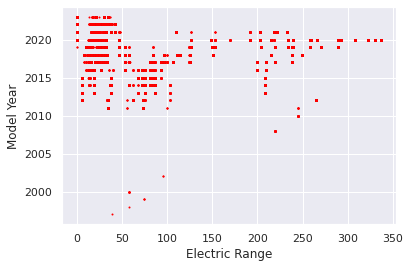

In [ ]:
#scatter plot
plt.scatter(df["Electric Range"],df["Model Year"],c="red", s=1) 
plt.xlabel("Electric Range")
plt.ylabel("Model Year")


In [ ]:
#tried a k value of 2
k=2
X=np.array(list(zip(df['Electric Range'], df['Model Year'])))
model=KMeans(n_clusters=k)
kmeans=model.fit(X)
labels=model.predict(X)
centroids=model.cluster_centers_

print(labels)
print(centroids)


[1 1 0 ... 0 0 1]
[[ 231.57958826 2018.29446635]
 [  22.29709103 2019.60095817]]


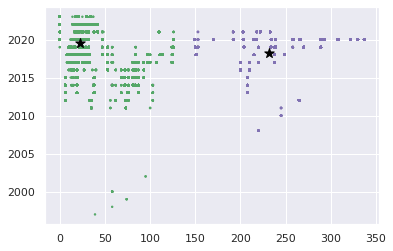

In [ ]:
#Plotted the data and centroids on the scatter plot
#mapped the labels to colors
c=['m','g','b','r','y','c']
colors=[c[i] for i in labels]

plt.scatter(df['Electric Range'], df['Model Year'], c=colors, s=2)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')

In [ ]:
#Using the model that you have just trained, 
#you can use it to predict what cluster for any data pt
cluster=model.predict([[35,200]])[0]
print(c[cluster])

g


In [ ]:
#making preductions
cluster=model.predict([[50,2020]])[0]
print(c[cluster]) 

cluster=model.predict([[230,2018]])[0]
print(c[cluster]) 

cluster=model.predict([[200,2015]])[0]
print(c[cluster])

m
g
g


In [ ]:
#obtaining the silhouette coefficient(score)
from sklearn.metrics import silhouette_score

model=KMeans(n_clusters=2)
model.fit(X)
label=model.predict(X)

print(f'silhouette Score (n=2):  {silhouette_score(X,label)}')

silhouette Score (n=2):  0.8117937446180223
